In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
 
# ----------------------------------------------------------------
#        simply draws a thin-lens at the provided location
# parameters:
#     - z:    location along the optical axis (in mm)
#     - f:    focal length (in mm, can be negative if div. lens)
#     - diam: lens diameter in mm
#     - lbl:  label to identify the lens on the drawing
# ----------------------------------------------------------------
def add_lens(z, f, diam, lbl):
    ww, tw, rad = diam / 10.0, diam/3.0, diam / 2.0
    plt.plot([z, z],    [-rad, rad],                'k', linewidth=2)
    plt.plot([z, z+tw], [-rad, -rad+np.sign(f)*ww], 'k', linewidth=2)
    plt.plot([z, z-tw], [-rad, -rad+np.sign(f)*ww], 'k', linewidth=2)
    plt.plot([z, z+tw], [ rad,  rad-np.sign(f)*ww], 'k', linewidth=2)
    plt.plot([z, z-tw], [ rad,  rad-np.sign(f)*ww], 'k', linewidth=2)
    plt.plot([z+f, z+f], [-ww,ww], 'k', linewidth=2)
    plt.plot([z-f, z-f], [-ww,ww], 'k', linewidth=2)
    plt.text(z,rad+5.0, lbl, fontsize=12)
    plt.text(z,rad+2.0, 'f='+str(int(f)), fontsize=10)
 
# ----------------------------------------------------------------------
#      geometrical propagation of light rays from given source
# parameters:
#    - p0:  location of the source (z0, x0) along and off axis (in mm)
#    - NA:  numerical aperture of the beam (in degrees)
#    - nr:  number of rays to trace
#    - zl:  array with the location of the lenses
#    - ff:  array with the focal length of lenses
#    - lbl: label for the nature of the source
#    - col: color of the rays on plot
# ----------------------------------------------------------------------
def propagate_beam(p0, NA, nr, zl, ff, lbl='', col='b'):
    
    # aperture (maximum angle) in radians 
    apa = NA*np.pi/180.0
    
    #position of source is z0,x0
    z0 = p0[0]
    if (np.size(p0) == 2): x0 = p0[1]
    else:                  x0 = 0.0
 
    # list of lens positions    
    zl1, ff1 = zl[(z0 < zl)], ff[(z0 < zl)]
    nl  = np.size(zl1) # number of lenses
 
    zz, xx, tani = np.zeros(nl+2), np.zeros(nl+2), np.zeros(nl+2)
    tan0 = np.tan(apa/2.0) - np.tan(apa) * np.arange(nr)/(nr-1) 
 
    for i in range(nr):
        tani[0] = tan0[i] # initial incidence angle
        zz[0], xx[0] = z0, x0
        for j in range(nl):
            zz[j+1]   = zl1[j]
            xx[j+1]   = xx[j] + (zz[j+1]-zz[j]) * tani[j]
            tani[j+1] = tani[j] - xx[j+1] / ff1[j]
 
        zz[nl+1] = zmax
        xx[nl+1] = xx[nl] + (zz[nl+1]-zz[nl]) * tani[nl]
        plt.plot(zz, xx, col)
 


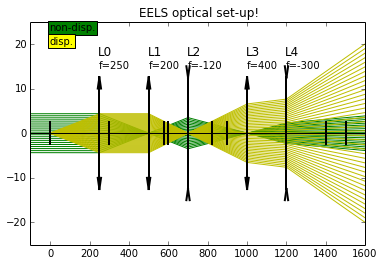

In [20]:
# ----------------------------------------------------------------------
#                            MAIN PROGRAM
# ----------------------------------------------------------------------
plt.clf()
 
zmin, zmax       = -100., 1600.
xmin, xmax       = -25, 25
bignum, smallnum = 1e6, 1e-6   # all distances expressed in mm
 
    
# ------------------------------------
#   location + focal length of optics
# ------------------------------------
zl = np.array([250.0, 500.0, 700.0, 1000.0, 1200.0]) # lens positions
ff = np.array([250.0, 200.0,  120.0,  400.0,   300.0]) # lens focal length
 
xsrc, zsrc, zpup = 2.0 , 0.0, -bignum # position of src and pupil
srcpos = (zsrc, xsrc)
 
#  draw the different beams
# --------------------------
#propagate_beam(srcpos,          4, 500, zl, ff, 'src1', 'b')
#propagate_beam((0.0, -2.),      4,  20, zl, ff, 'src1', 'r')
propagate_beam((-1e5,),    0.005,  20, zl, ff, 'non-disp.', 'g')
ff[2] = -ff[2]
ff[4] = -ff[4]

propagate_beam((0,),          2,  40, zl, ff, 'disp',   'y')
#propagate_beam((110,1),          2,  10, zl, ff, 'disp+E',   'r')

 
#  print a couple labels
# --------------------------
#plt.text(0, 20, 'src 1', bbox=dict(facecolor='blue', alpha=1), fontsize=10)
#plt.text(0, 17, 'src 2', bbox=dict(facecolor='red',  alpha=1), fontsize=10)
plt.text(0, 23, 'non-disp.', bbox=dict(facecolor='green',  alpha=1), fontsize=10)
plt.text(0, 20, 'disp.', bbox=dict(facecolor='yellow',  alpha=1), fontsize=10)
 
#      add the lenses
# -------------------------
for i in range(np.size(zl)): add_lens(zl[i], ff[i], 25, "L"+str(i))
 
#     plot optical axis
# -------------------------
plt.plot([zmin,zmax], [0,0], 'k')
plt.axis([zmin,zmax, xmin, xmax])
plt.title("EELS optical set-up!")
plt.show()
    